# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [156]:


import numpy as np
import pandas as pd
import seaborn as sns
from scipy import fft
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
jan_2023 = pd.read_csv('./data/spot/monthly/klines/ETHBTC/1h/ETHBTC-1h-2023-01.csv')
jan_2023.columns = ["open_time", "open", "high", "low", "close", "volume", "close_time","quote_assets_volume", "number_of_trades", "taker_buy_base_asset_vol", "taker_buy_quote_asset_vol", "ignore"]
jan_2023['open_date'] = pd.to_datetime(jan_2023['open_time'], unit='ms').dt.strftime('%Y-%m-%d:%H-%M')

In [24]:
jan_2023

,open_time,open,high,low,close,volume,close_time,quote_assets_volume,number_of_trades,taker_buy_base_asset_vol,taker_buy_quote_asset_vol,ignore,open_date
0,1672534800000,0.072234,0.072304,0.072230,0.072260,953.5099,1672538399999,68.907959,2183,492.8619,35.617885,0,2023-01-01:01-00
1,1672538400000,0.072259,0.072271,0.072200,0.072246,1175.6682,1672541999999,84.921373,2431,546.0779,39.448943,0,2023-01-01:02-00
2,1672542000000,0.072246,0.072246,0.072130,0.072214,1314.0243,1672545599999,94.855362,2674,668.8465,48.282120,0,2023-01-01:03-00
3,1672545600000,0.072202,0.072202,0.072110,0.072198,971.9444,1672549199999,70.145116,2036,559.4448,40.375430,0,2023-01-01:04-00
4,1672549200000,0.072198,0.072289,0.072197,0.072261,648.4162,1672552799999,46.851740,1321,307.9091,22.245704,0,2023-01-01:05-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,1675191600000,0.068818,0.068987,0.068742,0.068962,1414.8165,1675195199999,97.399492,3793,646.1923,44.488449,0,2023-01-31:19-00
739,1675195200000,0.068961,0.068988,0.068623,0.068725,1544.6191,1675198799999,106.217543,4623,678.5135,46.656303,0,2023-01-31:20-00
740,1675198800000,0.068724,0.068785,0.068391,0.068736,3088.8672,1675202399999,211.818483,7485,1198.9728,82.212200,0,2023-01-31:21-00
741,1675202400000,0.068739,0.068773,0.068588,0.068604,1911.0048,1675205999999,131.240445,5196,896.9443,61.601373,0,2023-01-31:22-00


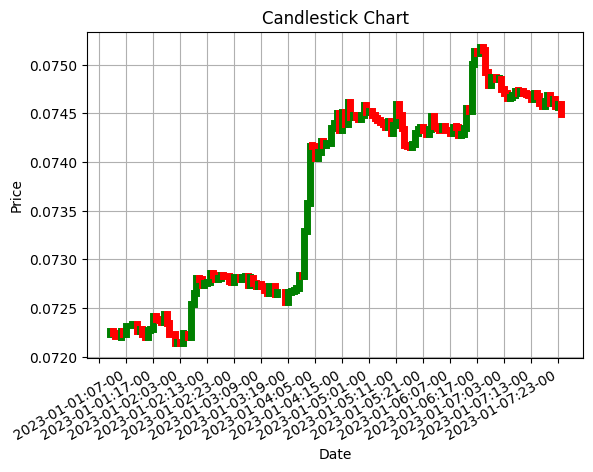

In [172]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = jan_2023.iloc[:24*7]

def plot_open_values(df, interval=10):
    # Set the figure size
    # plt.figure(figsize=(10, 6))
    
    # Plot each candlestick
    for i in range(len(df)):
        color = 'green' if df['close'][i] >= df['open'][i] else 'red'
        # plt.plot([df['open_date'][i], df['open_date'][i]], [df['low'][i], df['high'][i]], color='black')  # high-low line
        plt.plot([df['open_date'][i], df['open_date'][i]], [df['open'][i], df['close'][i]], color=color, linewidth=5)  # open-close line
    
    # Format the x-axis
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval))  # Set ticks every 10 days
    plt.gcf().autofmt_xdate()
    
    # Add labels and titleHourLocator
    plt.title('Candlestick Chart')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()
plot_open_values(df)
plt.show()


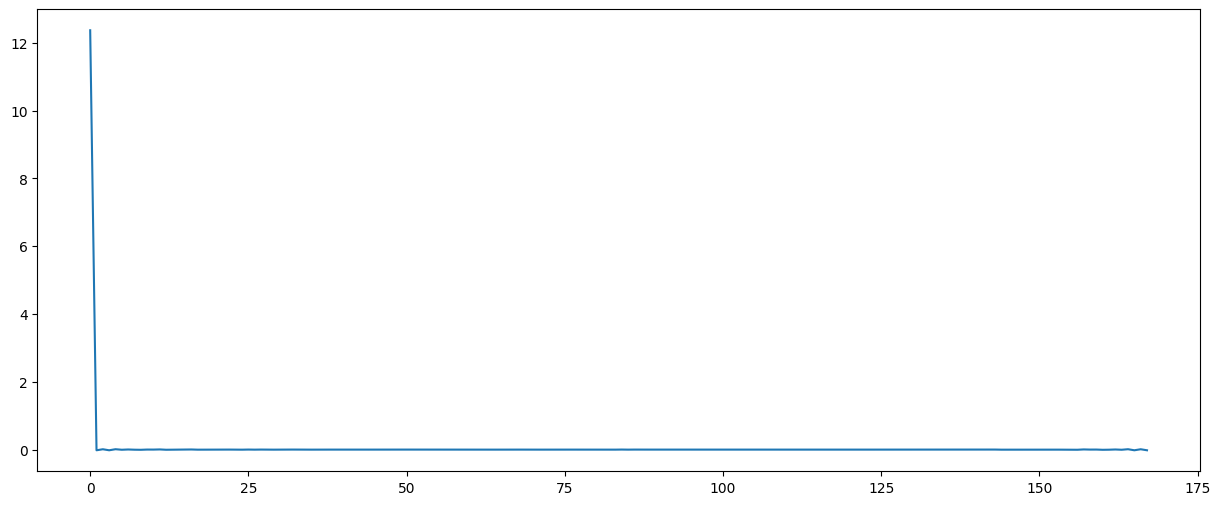

In [110]:
def frequency_of_coef(k, freqs, N):
    f = freqs.real[k]
    return np.array([(1 / N) * f * np.pow(np.e, complex(0, 2 * np.pi * k * n / N)) for n in range(N)])

df = jan_2023.iloc[:24*7]
freqs = fft.fft(df['close'])
plt.figure(figsize=(15, 6))


N = len(df)

plt.plot(range(len(freqs)), freqs.real)

/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


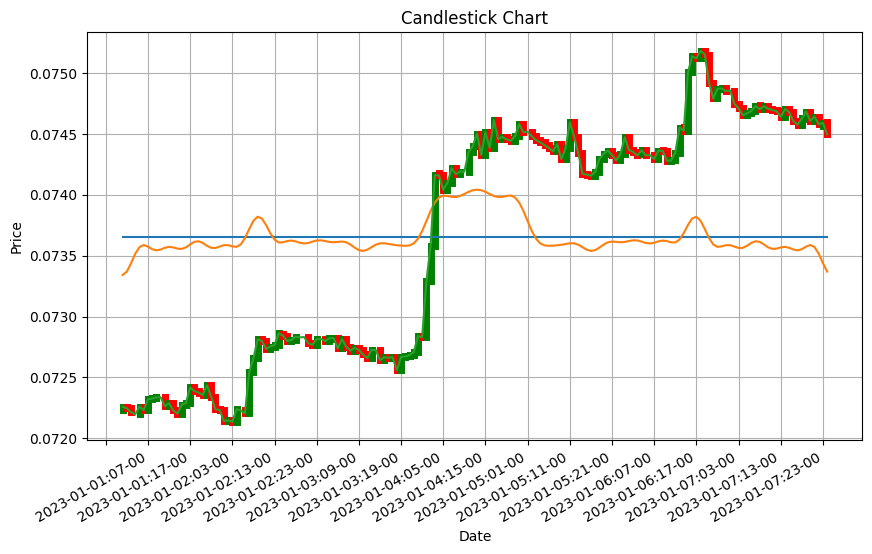

In [124]:
plot_open_values(df)
base = frequency_of_coef(0, freqs, N)
plt.plot(range(N), base)
# for i in range(1,10):
#     plt.plot(range(N), base + frequency_of_coef(i, freqs, N))
plt.plot(range(N), sum([frequency_of_coef(i, freqs, N) for i in range(25)]))
plt.plot(range(N), fft.ifft(freqs))
plt.show()

/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


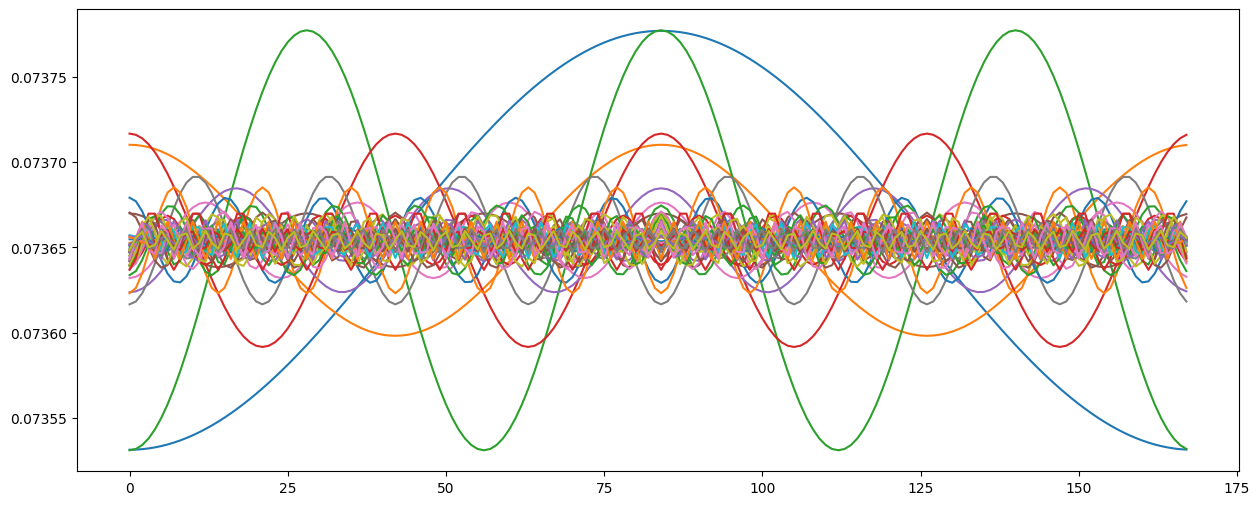

In [111]:
plt.figure(figsize=(15, 6))
base = frequency_of_coef(0, freqs, N)
for d in range(1, 50):
    plt.plot(range(N), base + frequency_of_coef(d, freqs, N))


/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


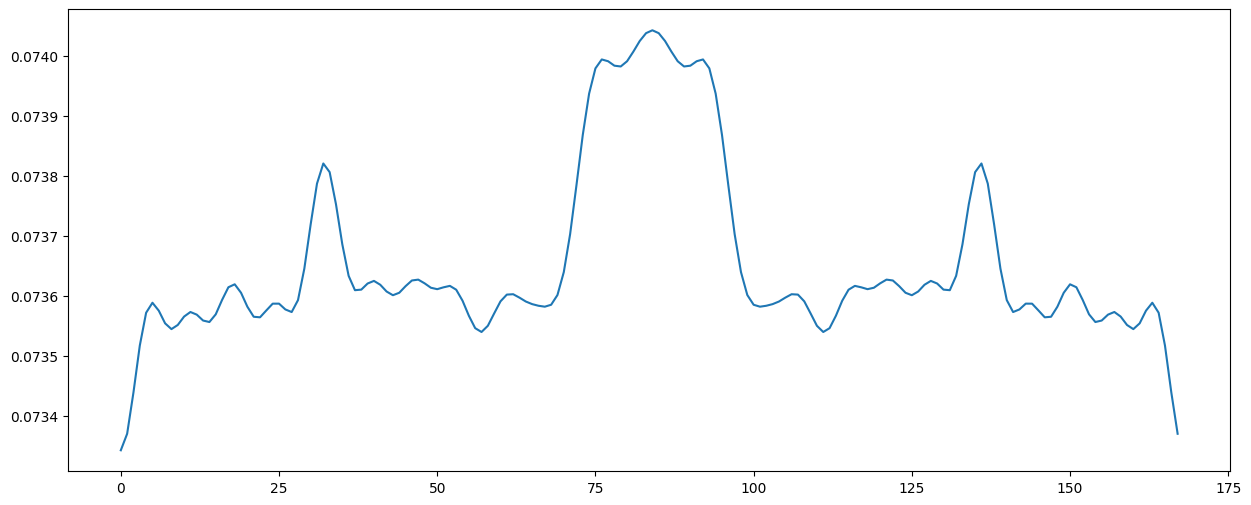

In [121]:
plt.figure(figsize=(15, 6))
base = frequency_of_coef(0, freqs, N)
plt.plot(range(N), sum([frequency_of_coef(i, freqs, N) for i in range(25)]))


/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


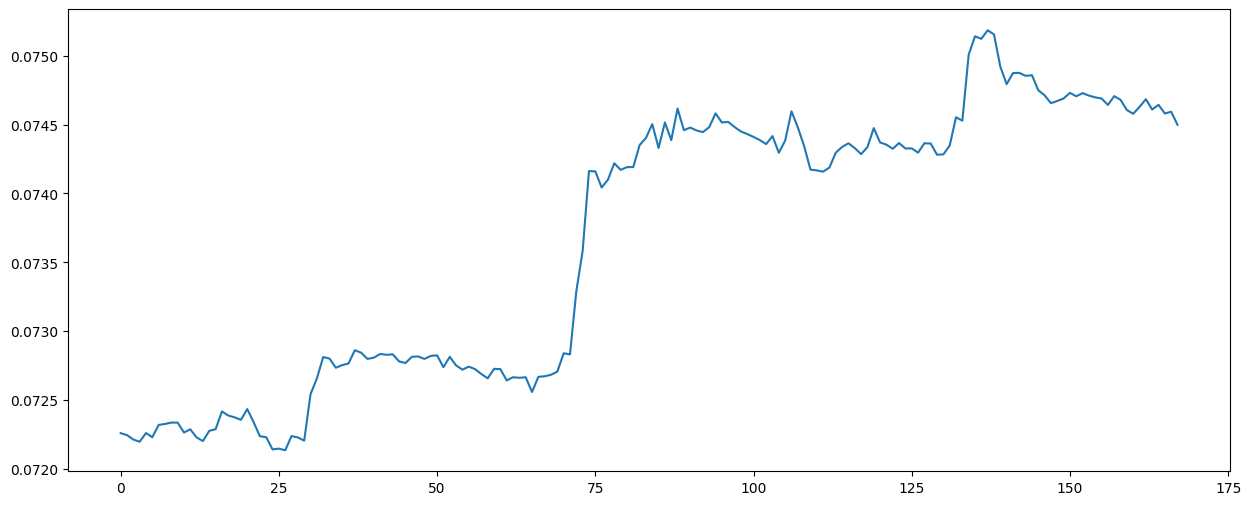

In [123]:
plt.figure(figsize=(15, 6))
base = frequency_of_coef(0, freqs, N)
plt.plot(range(N), fft.ifft(freqs))


In [131]:
embedding = []
days = int(len(jan_2023) / 24)
for d in range(days - 1):
    df = jan_2023.iloc[d * 24:(d + 1) * 24]
    freqs = fft.fft(df['close'])
    embedding.append(freqs)
embedding_df = pd.DataFrame(embedding)


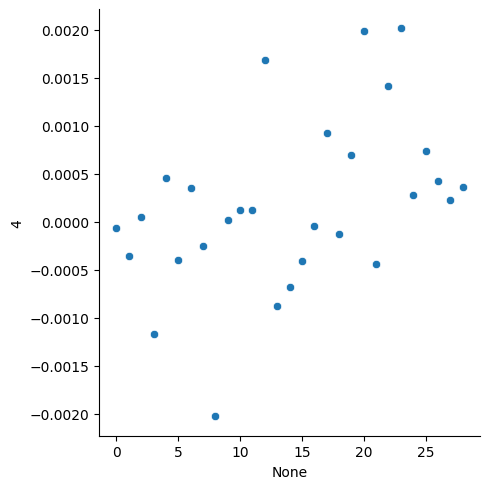

In [143]:
sns.relplot(embedding_df.apply(np.real), y = 4, x = embedding_df.index)

In [144]:
embedding_df.apply(np.real).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.753421,0.000011,-0.000229,0.000134,0.000173,-0.000051,-0.000014,0.000047,0.000054,-0.000007,...,-0.000027,-0.000007,0.000054,0.000047,-0.000014,-0.000051,0.000173,0.000134,-0.000229,0.000011
std,0.058687,0.002335,0.001068,0.000941,0.000888,0.000734,0.000783,0.000761,0.000687,0.000425,...,0.000588,0.000425,0.000687,0.000761,0.000783,0.000734,0.000888,0.000941,0.001068,0.002335
min,1.647304,-0.005169,-0.002488,-0.002017,-0.002028,-0.001545,-0.001626,-0.002142,-0.001040,-0.000970,...,-0.001347,-0.000970,-0.001040,-0.002142,-0.001626,-0.001545,-0.002028,-0.002017,-0.002488,-0.005169
25%,1.716137,-0.001368,-0.001031,-0.000390,-0.000353,-0.000424,-0.000413,-0.000293,-0.000369,-0.000292,...,-0.000387,-0.000292,-0.000369,-0.000293,-0.000413,-0.000424,-0.000353,-0.000390,-0.001031,-0.001368
50%,1.772993,-0.000050,-0.000201,0.000185,0.000119,-0.000087,0.000014,0.000144,0.000048,-0.000051,...,-0.000144,-0.000051,0.000048,0.000144,0.000014,-0.000087,0.000119,0.000185,-0.000201,-0.000050
75%,1.784658,0.001908,0.000440,0.000487,0.000451,0.000275,0.000258,0.000552,0.000443,0.000270,...,0.000205,0.000270,0.000443,0.000552,0.000258,0.000275,0.000451,0.000487,0.000440,0.001908
max,1.846011,0.004346,0.001789,0.002896,0.002014,0.001919,0.001594,0.001265,0.001356,0.000901,...,0.001353,0.000901,0.001356,0.001265,0.001594,0.001919,0.002014,0.002896,0.001789,0.004346


/home/leocenturion/.cache/pypoetry/virtualenvs/tp_final-oVDAd-_Z-py3.11/lib64/python3.11/site-packages/pandas/core/internals/managers.py:1688: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(blk.values, dtype=dtype, copy=copy)


<Axes: >

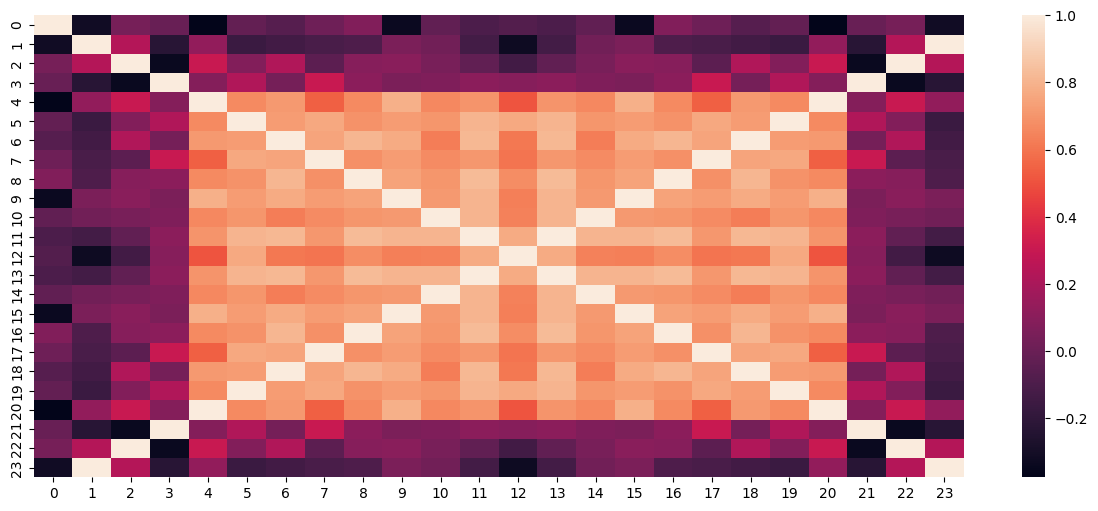

In [154]:
plt.figure(figsize=(15, 6))
sns.heatmap(embedding_df.apply(np.real).corr())

In [151]:
embedding_df.apply(np.real).corr()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.000000,-0.313005,0.039579,-0.005967,-0.375426,-0.022232,-0.067583,0.015801,0.072961,-0.335325,...,-0.028660,-0.335325,0.072961,0.015801,-0.067583,-0.022232,-0.375426,-0.005967,0.039579,-0.313005
1,-0.313005,1.000000,0.233446,-0.225373,0.127231,-0.164364,-0.137954,-0.107746,-0.094713,0.057254,...,0.024018,0.057254,-0.094713,-0.107746,-0.137954,-0.164364,0.127231,-0.225373,0.233446,1.000000
2,0.039579,0.233446,1.000000,-0.340123,0.305596,0.079241,0.223113,-0.044361,0.086849,0.100058,...,0.047911,0.100058,0.086849,-0.044361,0.223113,0.079241,0.305596,-0.340123,1.000000,0.233446
3,-0.005967,-0.225373,-0.340123,1.000000,0.084873,0.221805,0.034525,0.306366,0.104206,0.057426,...,0.070471,0.057426,0.104206,0.306366,0.034525,0.221805,0.084873,1.000000,-0.340123,-0.225373
4,-0.375426,0.127231,0.305596,0.084873,1.000000,0.665521,0.712967,0.542354,0.662809,0.786621,...,0.658093,0.786621,0.662809,0.542354,0.712967,0.665521,1.000000,0.084873,0.305596,0.127231
5,-0.022232,-0.164364,0.079241,0.221805,0.665521,1.000000,0.723451,0.758763,0.689583,0.720668,...,0.701669,0.720668,0.689583,0.758763,0.723451,1.000000,0.665521,0.221805,0.079241,-0.164364
6,-0.067583,-0.137954,0.223113,0.034525,0.712967,0.723451,1.000000,0.748232,0.809153,0.773952,...,0.625402,0.773952,0.809153,0.748232,1.000000,0.723451,0.712967,0.034525,0.223113,-0.137954
7,0.015801,-0.107746,-0.044361,0.306366,0.542354,0.758763,0.748232,1.000000,0.686978,0.720927,...,0.672254,0.720927,0.686978,1.000000,0.748232,0.758763,0.542354,0.306366,-0.044361,-0.107746
8,0.072961,-0.094713,0.086849,0.104206,0.662809,0.689583,0.809153,0.686978,1.000000,0.745850,...,0.703606,0.745850,1.000000,0.686978,0.809153,0.689583,0.662809,0.104206,0.086849,-0.094713
9,-0.335325,0.057254,0.100058,0.057426,0.786621,0.720668,0.773952,0.720927,0.745850,1.000000,...,0.709967,1.000000,0.745850,0.720927,0.773952,0.720668,0.786621,0.057426,0.100058,0.057254


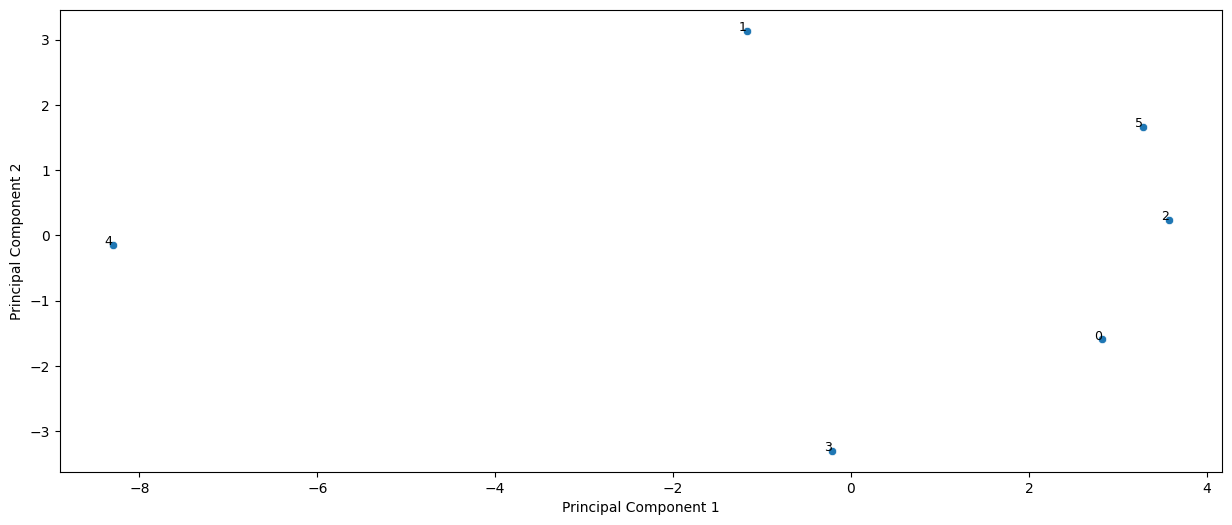

In [175]:
plt.figure(figsize=(15, 6))
def plot_pca(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    pca = PCA(n_components=2)  # Reduce to 2 components
    
    # Fit and transform the data
    pca_result = pca.fit_transform(scaled_data)
    
    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
    sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
    for i in range(len(pca_df)):
        plt.text(pca_df['Principal Component 1'][i], 
                 pca_df['Principal Component 2'][i], 
                 str(pca_df.index[i]), 
                 fontsize=9, 
                 ha='right')
plot_pca(embedding_df.apply(np.real).iloc[4:10])
# plot_pca(embedding_df.apply(np.real))

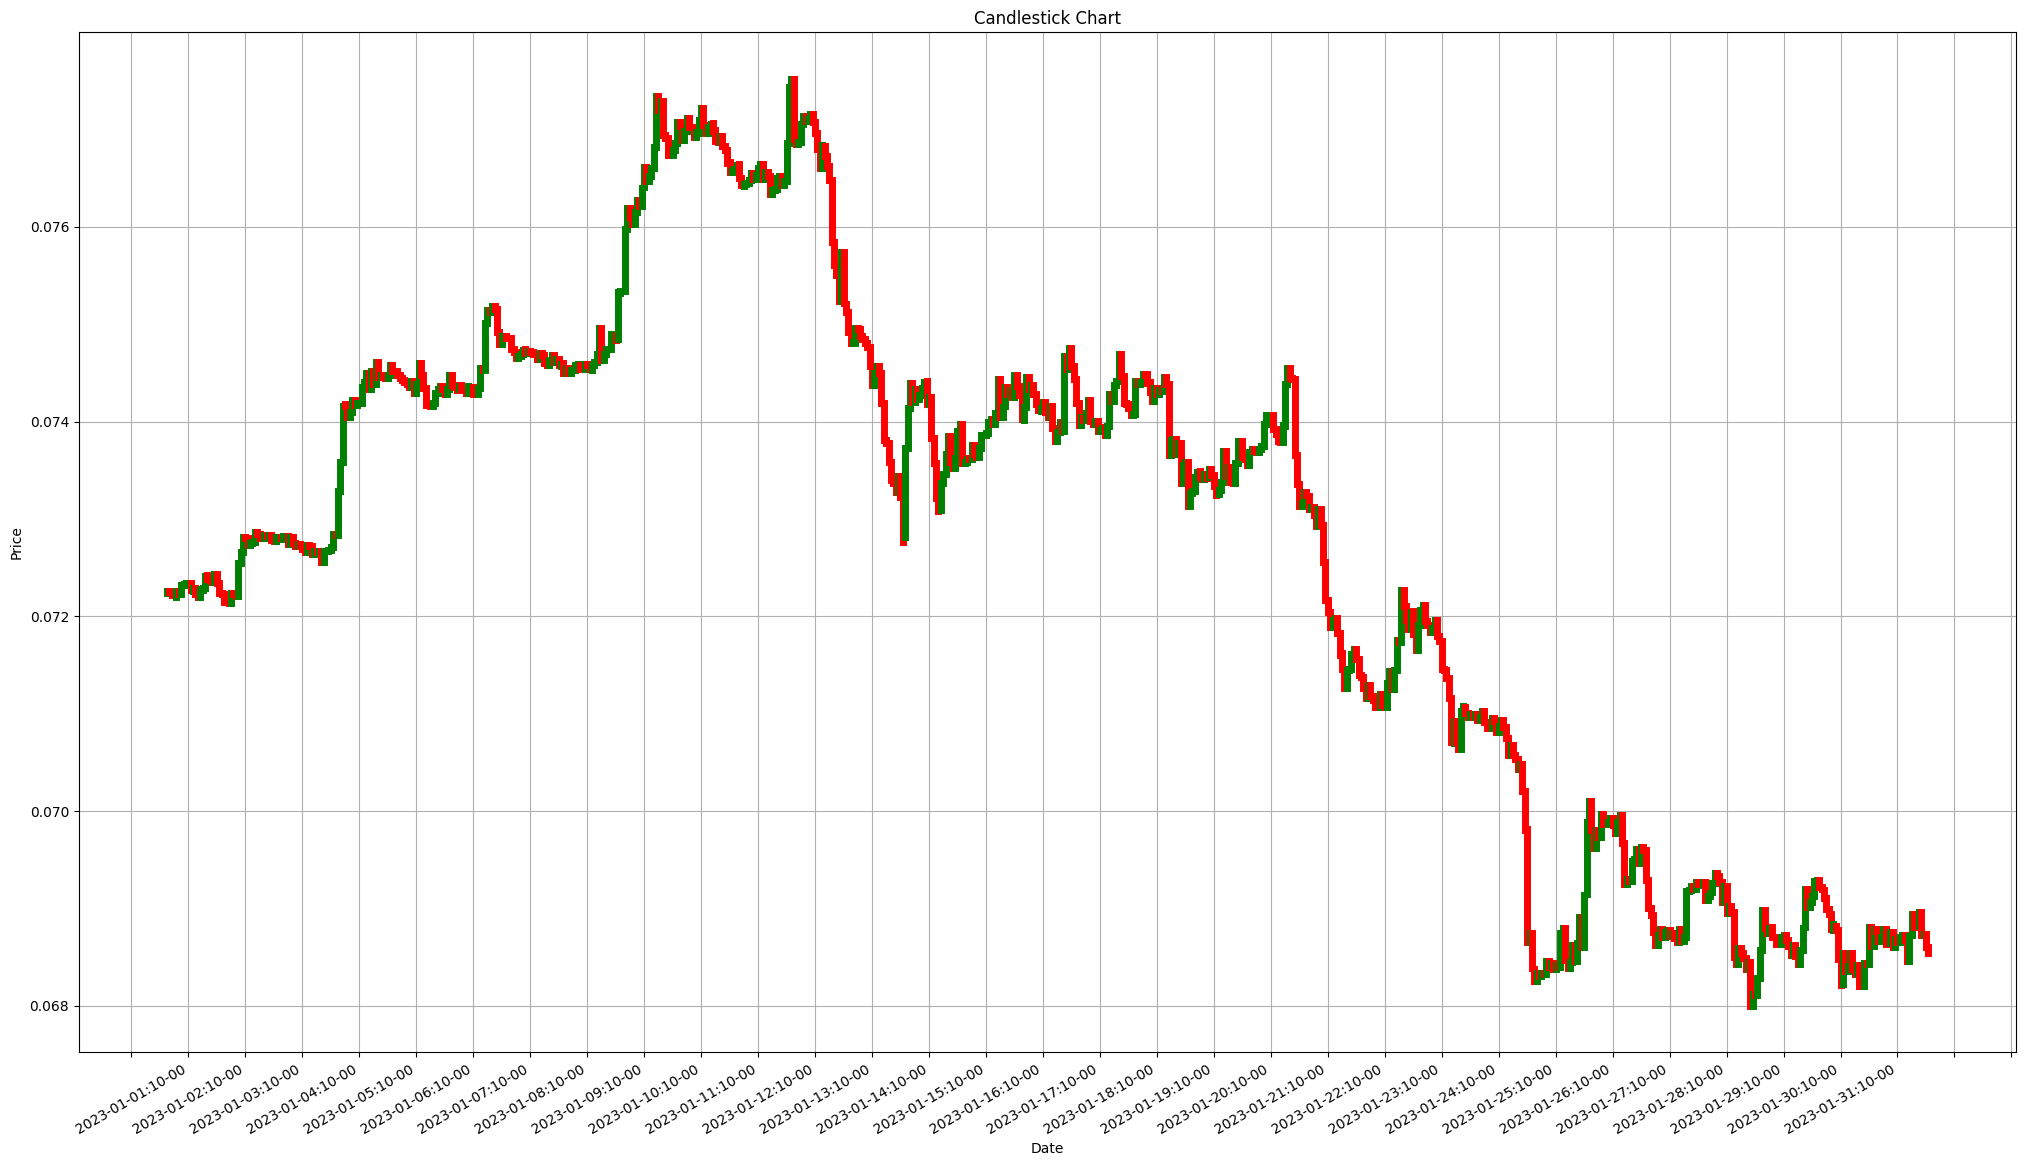

In [174]:
plt.figure(figsize=(25, 15))
plot_open_values(jan_2023, interval=24)

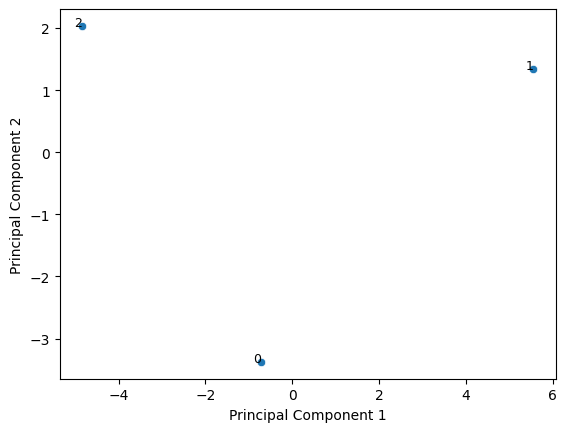

In [184]:
# 4-7 sable
# plot_pca(embedding_df.apply(np.real).iloc[4:9])
# 8-10 increases rapidly
# plot_pca(embedding_df.apply(np.real).iloc[8:9])

# 8-10 steady
plot_pca(embedding_df.apply(np.real).iloc[9:12])


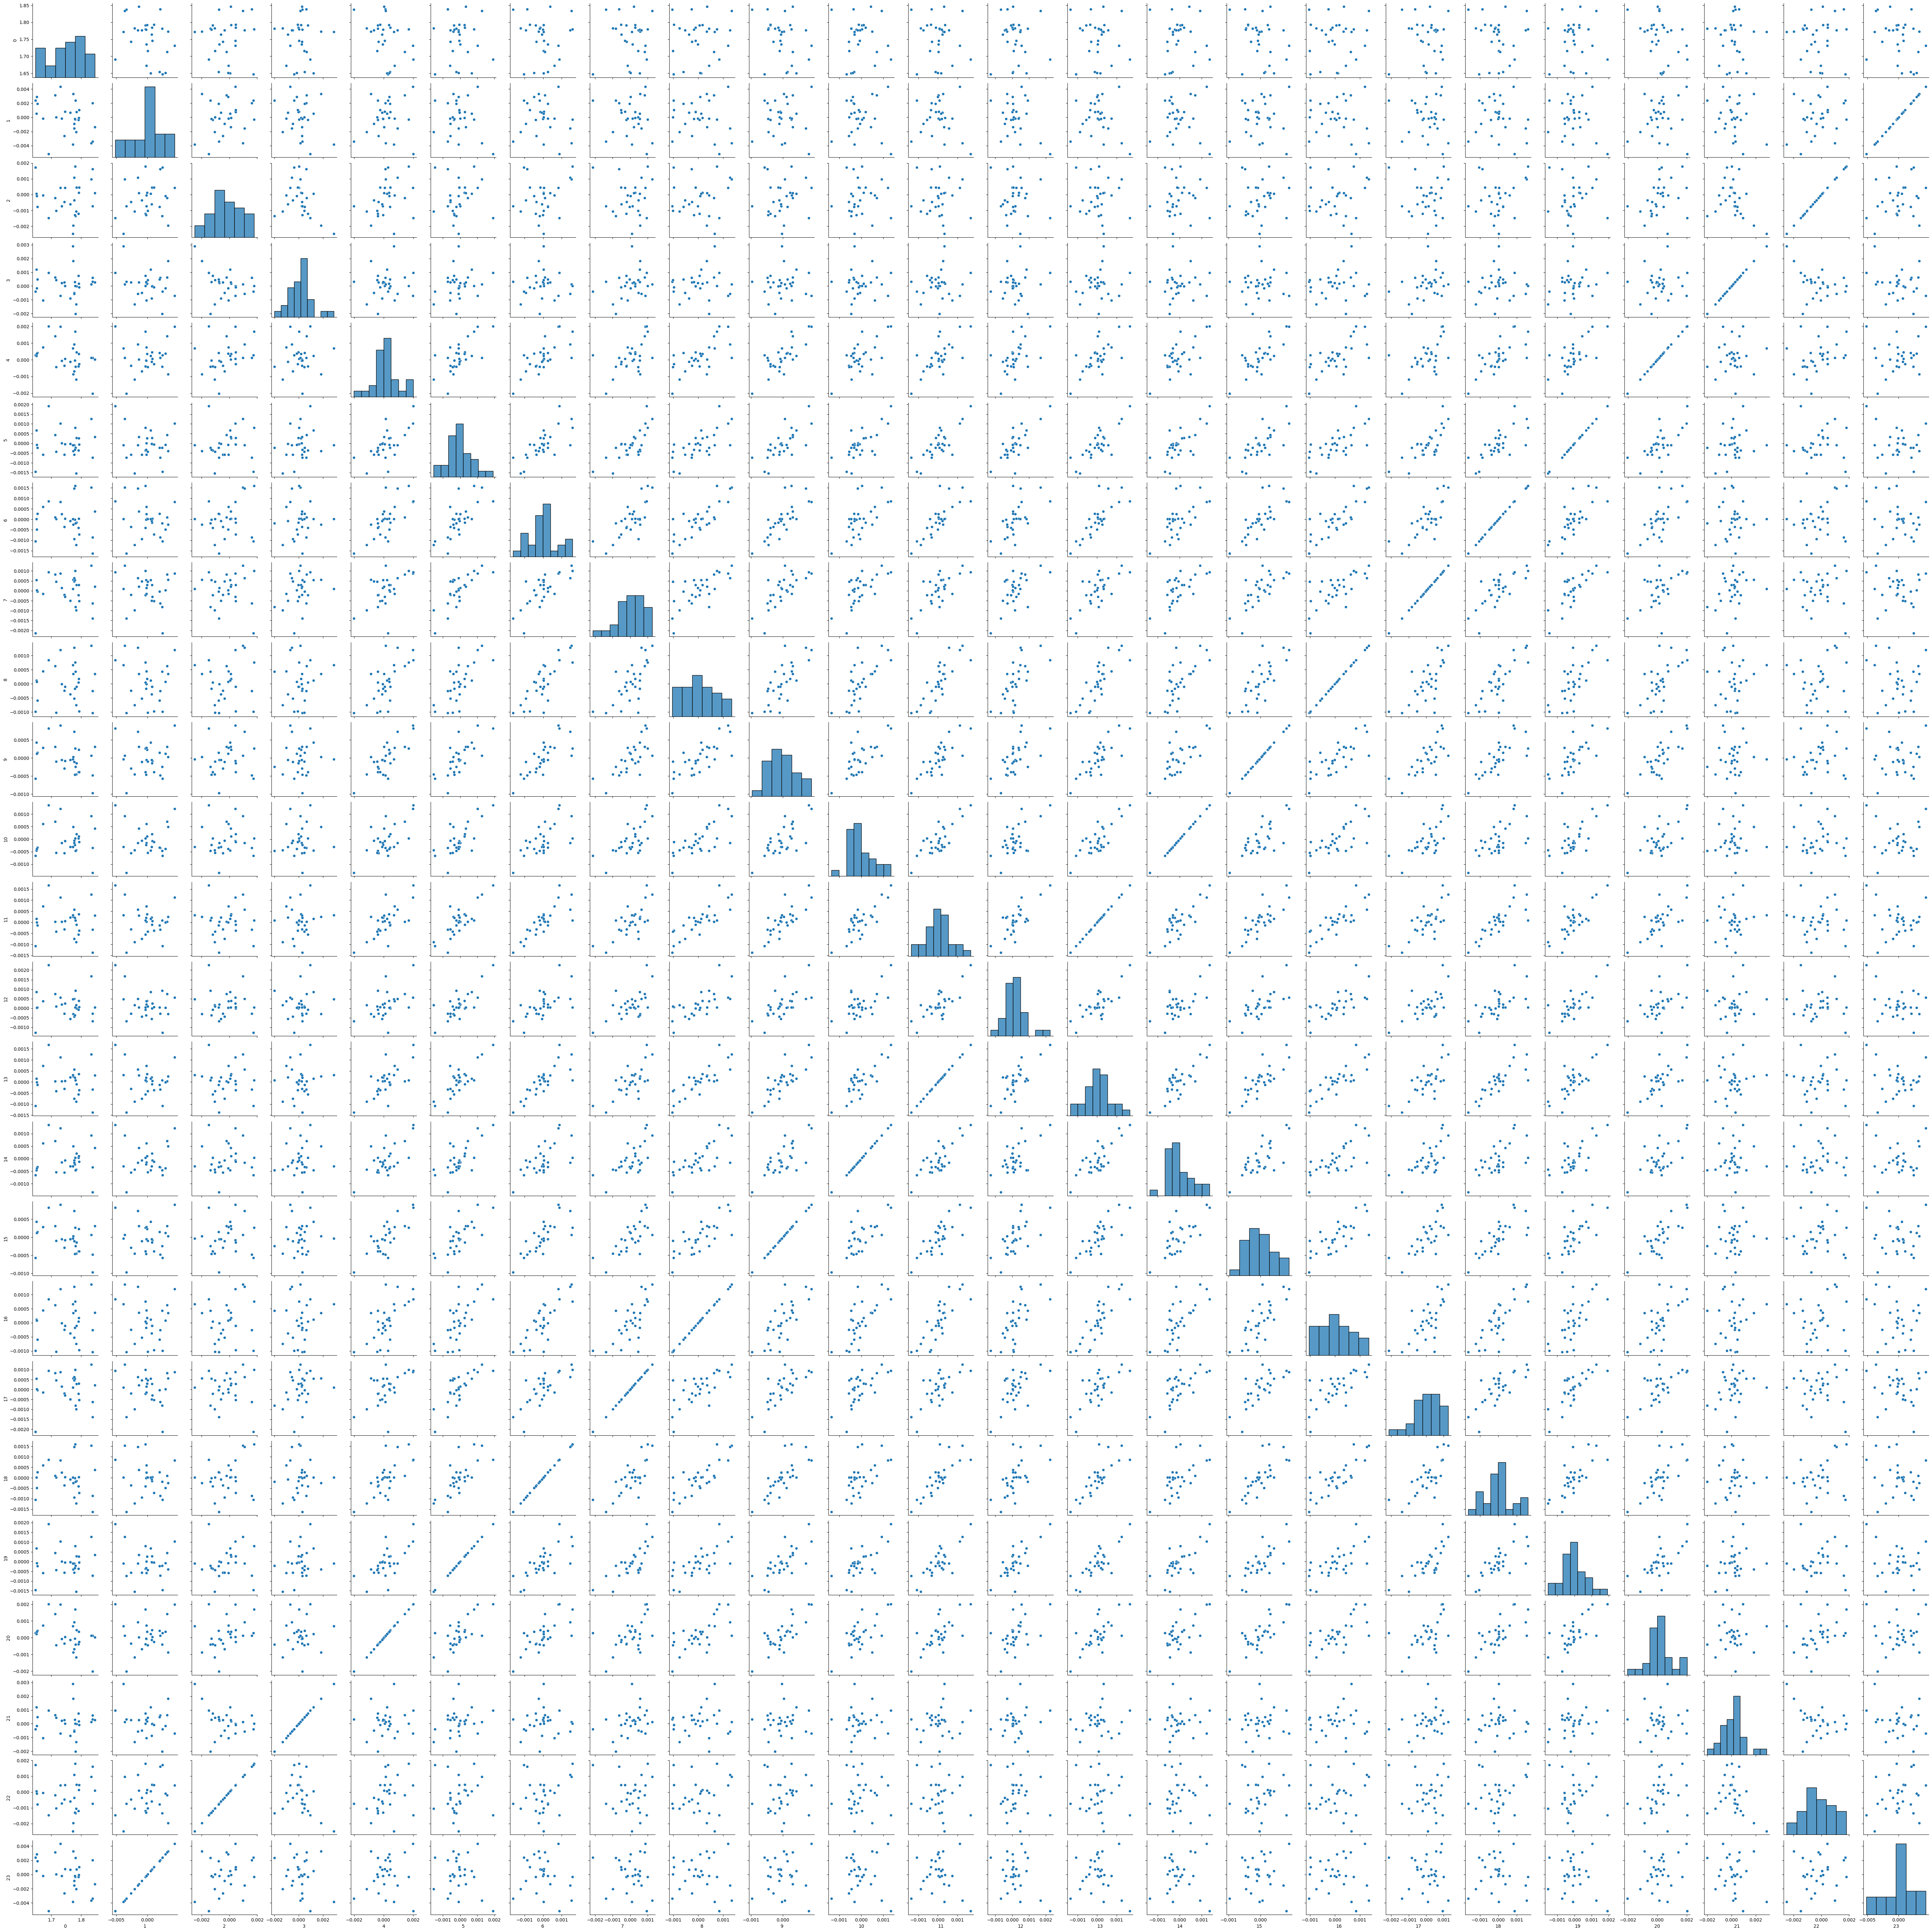

In [182]:
sns.pairplot(embedding_df.apply(np.real))